<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Final_Project_Stock_06_Decision_Tree_2330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving 2330.TW.csv to 2330.TW (1).csv


In [3]:
# Store the data into a data frame
df = pd.read_csv('2330.TW.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,619.0,632.0,618.0,631.0,617.366394,69089158
1,2022-01-04,645.0,656.0,644.0,656.0,641.826294,79434666
2,2022-01-05,669.0,669.0,646.0,650.0,635.955872,69593809
3,2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211
4,2022-01-07,643.0,646.0,632.0,634.0,620.301636,38249908
5,2022-01-10,628.0,645.0,627.0,643.0,629.107178,38289770


In [4]:
df = df.drop(['High', 'Low'], axis=1)
df.head(6)

,Date,Open,Close,Adj Close,Volume
0,2022-01-03,619.0,631.0,617.366394,69089158
1,2022-01-04,645.0,656.0,641.826294,79434666
2,2022-01-05,669.0,650.0,635.955872,69593809
3,2022-01-06,638.0,644.0,630.085571,53210211
4,2022-01-07,643.0,634.0,620.301636,38249908
5,2022-01-10,628.0,643.0,629.107178,38289770


In [5]:
df.rename(columns = {'Open':'Open Price', 'Close':'Close Price', 'Adj Close':'Adj Close Price'}, inplace = True)
df.head(6)

,Date,Open Price,Close Price,Adj Close Price,Volume
0,2022-01-03,619.0,631.0,617.366394,69089158
1,2022-01-04,645.0,656.0,641.826294,79434666
2,2022-01-05,669.0,650.0,635.955872,69593809
3,2022-01-06,638.0,644.0,630.085571,53210211
4,2022-01-07,643.0,634.0,620.301636,38249908
5,2022-01-10,628.0,643.0,629.107178,38289770


In [6]:
# Get the number of trading days
df.shape

(247, 5)

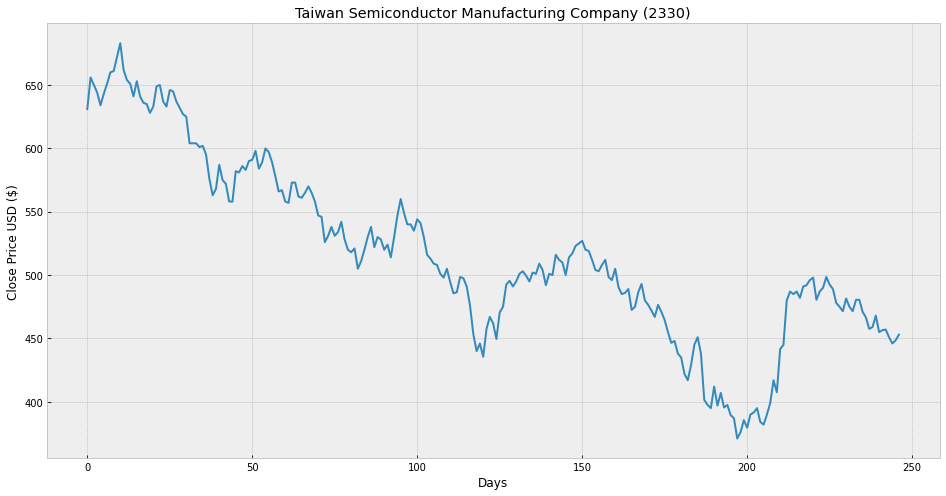

In [7]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Taiwan Semiconductor Manufacturing Company (2330)')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

In [8]:
# Get the close price
df = df[['Close Price']]
df.head(4)

,Close Price
0,631.0
1,656.0
2,650.0
3,644.0


In [9]:
# Create a variable to predict 'x' days out into the future
future_days = 5

# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close Price']].shift(-future_days)
df.tail(4)

<ipython-input-9-17b1ac2c7e09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close Price']].shift(-future_days)


,Close Price,Prediction
243,451.0,NaN
244,446.0,NaN
245,448.5,NaN
246,453.0,NaN


In [10]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[631. ]
 [656. ]
 [650. ]
 [644. ]
 [634. ]
 [643. ]
 [651. ]
 [660. ]
 [661. ]
 [672. ]
 [683. ]
 [662. ]
 [654. ]
 [651. ]
 [641. ]
 [653. ]
 [641. ]
 [636. ]
 [635. ]
 [628. ]
 [633. ]
 [649. ]
 [650. ]
 [637. ]
 [633. ]
 [646. ]
 [645. ]
 [637. ]
 [632. ]
 [627. ]
 [625. ]
 [604. ]
 [604. ]
 [604. ]
 [601. ]
 [602. ]
 [595. ]
 [576. ]
 [563. ]
 [568. ]
 [587. ]
 [575. ]
 [572. ]
 [558. ]
 [558. ]
 [582. ]
 [581. ]
 [586. ]
 [583. ]
 [590. ]
 [591. ]
 [598. ]
 [584. ]
 [589. ]
 [600. ]
 [597. ]
 [589. ]
 [578. ]
 [566. ]
 [567. ]
 [558. ]
 [557. ]
 [573. ]
 [573. ]
 [562. ]
 [561. ]
 [565. ]
 [570. ]
 [565. ]
 [558. ]
 [547. ]
 [546. ]
 [526. ]
 [531. ]
 [538. ]
 [531. ]
 [534. ]
 [542. ]
 [528. ]
 [520. ]
 [518. ]
 [521. ]
 [505. ]
 [511. ]
 [520. ]
 [530. ]
 [538. ]
 [522. ]
 [530. ]
 [528. ]
 [520. ]
 [524. ]
 [514. ]
 [530. ]
 [547. ]
 [560. ]
 [549. ]
 [540. ]
 [540. ]
 [535. ]
 [544. ]
 [541. ]
 [530. ]
 [516. ]
 [513. ]
 [509. ]
 [508. ]
 [501. ]
 [498. ]
 [505. ]
 [494.5]
 

<ipython-input-10-bcfeb313f00b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [11]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[643.  651.  660.  661.  672.  683.  662.  654.  651.  641.  653.  641.
 636.  635.  628.  633.  649.  650.  637.  633.  646.  645.  637.  632.
 627.  625.  604.  604.  604.  601.  602.  595.  576.  563.  568.  587.
 575.  572.  558.  558.  582.  581.  586.  583.  590.  591.  598.  584.
 589.  600.  597.  589.  578.  566.  567.  558.  557.  573.  573.  562.
 561.  565.  570.  565.  558.  547.  546.  526.  531.  538.  531.  534.
 542.  528.  520.  518.  521.  505.  511.  520.  530.  538.  522.  530.
 528.  520.  524.  514.  530.  547.  560.  549.  540.  540.  535.  544.
 541.  530.  516.  513.  509.  508.  501.  498.  505.  494.5 485.5 486.5
 498.5 497.5 491.  476.  453.5 440.  446.  435.5 457.5 467.  462.  449.5
 470.5 475.  492.5 495.5 491.  495.  501.  503.  499.5 495.  502.  501.
 509.  504.  492.  501.  500.  516.  512.  510.  500.  514.  517.  523.
 525.  527.  520.  519.  512.  504.  503.  508.  512.  498.5 496.  505.
 490.5 485.  486.  489.  472.5 475.  486.5 493.  480.  476.5 4

In [12]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [14]:
# Get the last 'x' rows of the future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-14-50b62dee84c5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[457.5],
       [459. ],
       [468. ],
       [455. ],
       [456.5]])

In [15]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[457. 451. 446. 422. 457.]



<ipython-input-16-41580ea8747c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


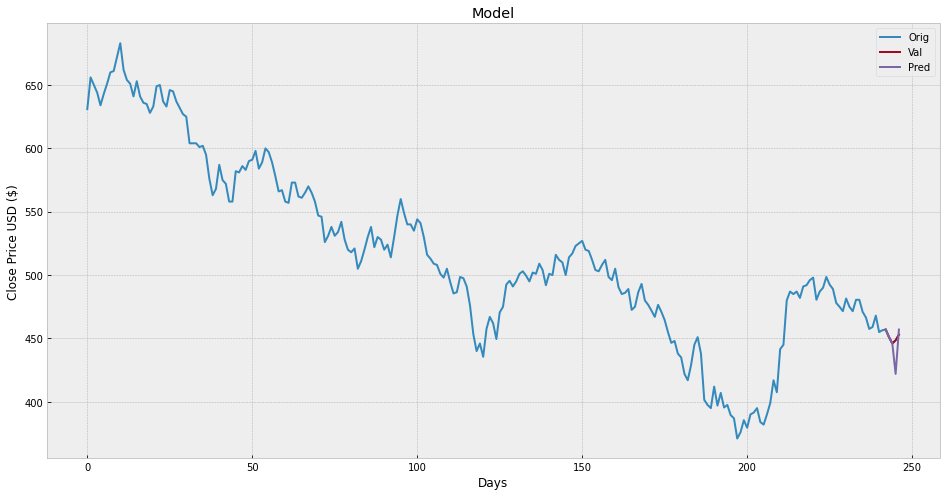

In [16]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix  


acc_decision_tree_train = round(tree.score(x_train, y_train) * 100, 2)
print("Train Accuracy", acc_decision_tree_train, "%")



acc_decision_tree_test = round(tree.score(x_test, y_test) * 100, 2)
print('Test accuracy:', acc_decision_tree_test, "%")

Train Accuracy 97.84 %
Test accuracy: 85.96 %
